<a href="https://www.kaggle.com/code/avd1729/customized-neural-network?scriptVersionId=139319159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Setting up the environment**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/kaggle/input/air-quality/AirQualityUCI.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9471 entries, ('10/03/2004;18.00.00;2', '6;1360;150;11', '9;1046;166;1056;113;1692;1268;13', '6;48', '9;0') to (';;;;;;;;;;;;;;;;', nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                        --------------  ----- 
 0   Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;  6915 non-null   object
dtypes: object(1)
memory usage: 1.2+ MB


# **Data Preprocessing**

In [5]:
import charset_normalizer
with open('/kaggle/input/air-quality/AirQualityUCI.csv', 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [6]:
data = pd.read_csv("/kaggle/input/air-quality/AirQualityUCI.csv",encoding='ascii',delimiter=';')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [8]:
data = data.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [9]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [10]:
data['CO(GT)'] = data['CO(GT)'].str.replace(',','')
data['C6H6(GT)'] = data['C6H6(GT)'].str.replace(',','')
data['T'] = data['T'].str.replace(',','')
data['RH'] = data['RH'].str.replace(',','')
data['AH'] = data['AH'].str.replace(',','')

In [11]:
data['CO(GT)'] = data['CO(GT)'].fillna(0).astype(int)
data['C6H6(GT)'] = data['C6H6(GT)'].fillna(0).astype(int)
data['T'] = data['T'].fillna(0).astype(int)
data['RH'] = data['RH'].fillna(0).astype(int)
data['AH'] = data['AH'].fillna(0).astype(int)

In [12]:
data = data.astype({"T":"int","RH":"int","AH":"int"})

In [13]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,26,1360.0,150.0,119,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136,489,7578
1,10/03/2004,19.00.00,2,1292.0,112.0,94,955.0,103.0,1174.0,92.0,1559.0,972.0,133,477,7255
2,10/03/2004,20.00.00,22,1402.0,88.0,90,939.0,131.0,1140.0,114.0,1555.0,1074.0,119,540,7502
3,10/03/2004,21.00.00,22,1376.0,80.0,92,948.0,172.0,1092.0,122.0,1584.0,1203.0,110,600,7867
4,10/03/2004,22.00.00,16,1272.0,51.0,65,836.0,131.0,1205.0,116.0,1490.0,1110.0,112,596,7888


In [14]:
data = data.drop(['Date','Time'],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9471 non-null   int64  
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9471 non-null   int64  
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9471 non-null   int64  
 11  RH             9471 non-null   int64  
 12  AH             9471 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 962.0 KB


In [16]:
data.isnull().sum()

CO(GT)             0
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)           0
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                  0
RH                 0
AH                 0
dtype: int64

In [17]:
data['PT08.S1(CO)'] = data['PT08.S1(CO)'].fillna(0).astype(int)
data['NMHC(GT)'] = data['NMHC(GT)'].fillna(0).astype(int)
data['PT08.S2(NMHC)'] = data['PT08.S2(NMHC)'].fillna(0).astype(int)
data['NOx(GT)'] = data['NOx(GT)'].fillna(0).astype(int)
data['PT08.S3(NOx)'] = data['PT08.S3(NOx)'].fillna(0).astype(int)
data['NO2(GT)'] = data['NO2(GT)'].fillna(0).astype(int)
data['PT08.S4(NO2)'] = data['PT08.S4(NO2)'].fillna(0).astype(int)
data['PT08.S5(O3)'] = data['PT08.S5(O3)'].fillna(0).astype(int)

In [18]:
data[(data == 0).all(1)]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,0,0,0,0,0,0,0,0,0,0,0,0,0
9358,0,0,0,0,0,0,0,0,0,0,0,0,0
9359,0,0,0,0,0,0,0,0,0,0,0,0,0
9360,0,0,0,0,0,0,0,0,0,0,0,0,0
9361,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,0,0,0,0,0,0,0,0,0,0,0,0,0
9467,0,0,0,0,0,0,0,0,0,0,0,0,0
9468,0,0,0,0,0,0,0,0,0,0,0,0,0
9469,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data = data.iloc[:9356]

In [20]:
X = data.drop(['AH'],axis=1)
y = data[['AH']]

In [21]:
y = np.array(y, dtype=int)

In [22]:
X

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,26,1360,150,119,1046,166,1056,113,1692,1268,136,489
1,2,1292,112,94,955,103,1174,92,1559,972,133,477
2,22,1402,88,90,939,131,1140,114,1555,1074,119,540
3,22,1376,80,92,948,172,1092,122,1584,1203,110,600
4,16,1272,51,65,836,131,1205,116,1490,1110,112,596
...,...,...,...,...,...,...,...,...,...,...,...,...
9351,39,1297,-200,136,1102,523,507,187,1375,1583,182,363
9352,31,1314,-200,135,1101,472,539,190,1374,1729,219,293
9353,24,1163,-200,114,1027,353,604,179,1264,1269,243,237
9354,24,1142,-200,124,1063,293,603,175,1241,1092,269,183


In [23]:
y

array([[7578],
       [7255],
       [7502],
       ...,
       [7119],
       [6406],
       [5139]])

In [24]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# **Feature scaling**

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# **Custom Loss & Metric**

In [26]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [27]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [28]:
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold} 

# **Custom Layer**

In [29]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="he_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape)

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": tf.keras.activations.serialize(self.activation)}

# **ANN architecture**

In [30]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    MyDense(100, activation="relu", input_shape=[12]),
    MyDense(100, activation="relu"),
    MyDense(100, activation="relu"),
    MyDense(100, activation="relu"),
    MyDense(80, activation="relu"),
    MyDense(1)
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense (MyDense)          (None, 100)               1300      
                                                                 
 my_dense_1 (MyDense)        (None, 100)               10100     
                                                                 
 my_dense_2 (MyDense)        (None, 100)               10100     
                                                                 
 my_dense_3 (MyDense)        (None, 100)               10100     
                                                                 
 my_dense_4 (MyDense)        (None, 80)                8080      
                                                                 
 my_dense_5 (MyDense)        (None, 1)                 81        
                                                                 
Total params: 39,761
Trainable params: 39,761
Non-traina

# **Model training**

In [32]:
model.compile(loss=HuberLoss(2.0), optimizer="nadam",metrics=[HuberMetric(2.0)])
history = model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
176/176 [==============================] - 9s 7ms/step - loss: 9388.8105 - HuberMetric: 9388.8105 - val_loss: 2749.0374 - val_HuberMetric: 2749.0374
Epoch 2/5
176/176 [==============================] - 1s 5ms/step - loss: 1744.7101 - HuberMetric: 1744.7101 - val_loss: 1219.4092 - val_HuberMetric: 1219.4092
Epoch 3/5
176/176 [==============================] - 1s 5ms/step - loss: 992.5477 - HuberMetric: 992.5477 - val_loss: 888.8759 - val_HuberMetric: 888.8759
Epoch 4/5
176/176 [==============================] - 1s 6ms/step - loss: 752.5496 - HuberMetric: 752.5496 - val_loss: 740.8659 - val_HuberMetric: 740.8659
Epoch 5/5
176/176 [==============================] - 1s 5ms/step - loss: 644.0731 - HuberMetric: 644.0731 - val_loss: 637.2257 - val_HuberMetric: 637.2257


In [33]:
model.evaluate(X_test_scaled, y_test)

59/59 [==============================] - 0s 2ms/step - loss: 634.8453 - HuberMetric: 634.8453


[634.8452758789062, 634.8452758789062]

In [34]:
model.save("my_model_with_a_custom_layer")

# **Error analysis**

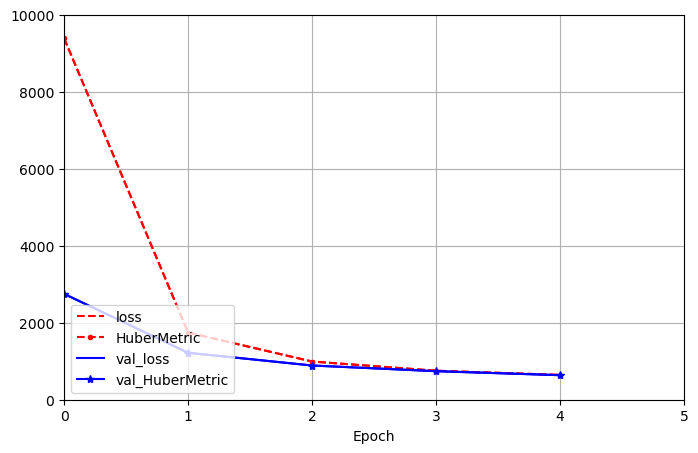

In [35]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 5], ylim=[0, 10000], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()